# Calculation of Kalman filter steps

## Calculation of 2 Kalman filter steps

I first show all the calculations I did and then I present the completed table.

From the motion equation:

$$x_k = x_{k-1} + \epsilon_t \quad \textrm{with} \quad \epsilon_t=\mathcal{N}(0,2)$$

we can derive $A = 1$ and $r^2=2$.

Additionally, from the measurement equation:

$$z_k = x_{k} + \delta_t \quad \textrm{with} \quad \delta_t=\mathcal{N}(0,3)$$

we can derive $C = 1$ and $q^2=3$.

In addition, we were given that the initial state is:

$$\mu_0 = 2, \quad \Sigma_0=5$$

Now we can move to calculate each step of the Kalman filter steps. For each
iteration we calculated the prediction, Kalman gain and measurement update.

> **Iteration 1 ($k=1$)** <br>
>
> _Prediction:_
>
> $$\bar{\mu}_1=\mu_0=2, \quad \bar{\Sigma}_1=\Sigma_0 + r^2=7$$
>
> _Kalman Gain:_
>
> $$K_1 = \frac{\bar{\Sigma}_1}{\bar{\Sigma}_1 + q^2} = 0.7$$
>
> _Measurement Update:_
>
> $$\mu_1 = \bar{\mu}_1 + K_1(z_1 - \bar{\mu}_1) = 1.3$$
>
> $$\Sigma_1 = (1 - K_1)\bar{\Sigma}_1 = 2.1$$

> **Iteration 2 ($k=2$)** <br>
>
> _Prediction:_
>
> $$\bar{\mu}_2 = \mu_1 = 1.3, \quad \bar{\Sigma}_2 = \Sigma_1 + r^2 = 4.1$$
>
> _Kalman Gain:_
>
> $$K_2 = \frac{\bar{\Sigma}_2}{\bar{\Sigma}_2 + q^2} = 0.5775$$
>
> _Measurement Update:_
>
> $$\mu_2 = \bar{\mu}_2 + K_2(z_2 - \bar{\mu}_2) = 1.7042$$
>
> $$\Sigma_2 = (1 - K_2)\bar{\Sigma}_2 = 1.7322$$

And now the completed table:

| k   | $\bar{\mu}_k$ | $\bar{\Sigma}_k$  | $K_k$ | $\mu_k$ | $\Sigma_k$ |
| :-: |:-------------:| :----------------:| :------:| :-----: | :--------: |
| 1   | 2             | 7                 | 0.7     | 1.3     | 2.1        |
| 2   | 1.3           | 4.1               | 0.5775  | 1.7042  | 1.7322   |

## Parameters Explanation
In Kalman filter the belief is always Gaussian, and Gaussian distributions are
described by means and covariance matrix. So, for each time step $t$ we got
means and variance matrix. Because our problem 1-D problem we got scalar for
both the mean and for the variance.

* $\bar{\mu}_k$: The mean of the prediction in time step $k$, before taking any
 measurement and relied only on the dynamics of the system.

* $\bar{\Sigma}_k$: The prediction of the uncertainty of step $k$. Calculated by the
 uncertainty of the previous step plus the noise of motion. This parameter also is before taking
 measurements.

* $K_k$: Kalman gain of step $k$.When the measurement uncertainty is very large and the estimate uncertainty is very small, the Kalman Gain is close to zero. Hence we give a big weight to the estimate and a small weight to the measurement.
 On the other side, when the measurement uncertainty is very small and the estimate uncertainty is very large, the Kalman Gain is close to one. Hence we give a small weight to the estimate and a big weight to the measurement.

* $\mu_k$: The updated prediction of the location in step $k$. The $\mu_k$ combining the estimation with the measurement using the Kalman gain.

* $\Sigma_k$: The updated uncertainty in step $k$ after using the Kalman gain in order to decrease the noise.

## Steady-State Covariance

Now we compute $\Sigma_{\infty}$ in our problem conditions:

$$\Sigma_k = (1 - K_k) \bar{\Sigma}_k = (1 - \frac{\bar{\Sigma}_k}{\bar{\Sigma}_k + q^2})\bar{\Sigma}_k  = \frac{q^2\bar{\Sigma}_k}{\bar{\Sigma}_k + q^2}$$

Given $A = 1$ we got $\bar{\Sigma}_k = \Sigma_{k-1} +r^2$. Additionally, because we are
looking for steady-state covariance matrix we can assume that when $t \to\infty$
we got $\Sigma_k = \Sigma_{k-1}$. Hence, $\bar{\Sigma}_k = \Sigma_{k} +r^2$. Now:

$$\Sigma_k = \frac{q^2(\Sigma_k + r^2)}{\Sigma_k + r^2 + q^2}$$ <br>
$$\Downarrow$$ <br>
$${\Sigma_k}^2 + \Sigma_k r^2 - q^2 r^2 = 0$$

Using the given $r^2=2$ and $q^2=3$ we got ${\Sigma_k}^2 + 2\Sigma_k - 6 = 0$.
We found:

In [1]:
from numpy import roots
sigma = roots([1, 2, -6])
print('Sigma_1 = {}, Sigma_2 = {}'.format(round(sigma[0], 3),
                                          round(sigma[1], 3)))

Sigma_1 = -3.646, Sigma_2 = 1.646


Since $\Sigma_k > 0$ for all $k$, we got:

$$\Sigma_{\infty} = 1.646$$


# Localization of a mobile robot using a Kalman Filter

## Matrices & Functions

From looking at the deterministic discrete dynamics of the robot it seen that the
dynamics are non-linear. The Extended Kalman Filter (EKF) solving the non-linearity issue.
So, instead of $A$ and $B$ matrices in the linear case it was needed
to find $g(u_t, x_{t-1})$, where:

$$ x_t = g(u_t, x_{t-1}) + \epsilon_t, \quad \epsilon_t=\mathcal{N}(0, R_t)$$

The state vector $x_t$ defined as $(x \quad y \quad \theta)^T$ and the control
vector $u_t$ defined as $(v_t \quad \omega_t)^T$.
Using the given dynamic equations and linear approximation we got:

$$g(u_t, x_{t-1}) \approx g(u_t, \mu_{t-1}) + G_t =
\begin{pmatrix}
\mu_{t-1, x} + v_t cos(\mu_{t-1, \theta} + \omega_t \Delta t) \\
\mu_{t-1, y} + v_t sin(\mu_{t-1, \theta} + \omega_t \Delta t) \\
\mu_{t-1, \theta} + \omega \Delta t
\end{pmatrix} + G_t$$

In order to find $x_t$ the EKF algorithm make use of local linearization. So the follows
$G_t$ matrix was needed:

$$G_t = \frac{\partial g(u_t, x_{t-1})}{\partial x_{t-1}}\mid_{x_{t-1} = \mu_{t-1}}$$

Using the above-mentioned definition we got:

$$G_t =
\begin{pmatrix}
1 & 0 & -v_t sin(\mu_{t-1, \theta} + \omega_t \Delta t) \\
0 & 1 & v_t cos(\mu_{t-1, \theta} + \omega_t \Delta t) \\
0 & 0 & 1
\end{pmatrix}$$

The same procedure was needed for the measurement update. First we needed non-linear function
$h(x_t)$ so that:

$$z_t = h(x_t) + \delta_t, \quad \delta_t=\mathcal{N}(0, Q_t)$$

As required in the exercise the measurements
were distance and direction to a landmark with fixed coordinates $m_x$ and $m_y$.
So, the $h(x_t)$ function which map from given state $x_t$ to measurement $z_t$ is:

$$h(x_t, m) =
\begin{pmatrix}
\sqrt{(m_x - x)^2 + (m_y - y)^2}\\
\operatorname{atan2}(m_y - y, m_x - x) - \theta \\
\end{pmatrix}$$

The linear approximation is now:

$$h(x_t, m) \approx h(\bar{\mu_t}, m) + H_t$$


The $H_t$ matrix was calculated as:

$$H_t = \frac{\partial h(x_t)}{\partial x_t}\mid_{x_t = \mu_t}$$

,hence:

$$H_t =
\begin{pmatrix}
\frac{\bar{\mu}_{t, x} - m_x}{\sqrt{q}} & \frac{\bar{\mu}_{t, y} - m_y}{\sqrt{q}} & 0 \\
\frac{m_y - \bar{\mu}_{t, y}}{q} & \frac{\bar{\mu}_{t, x} - m_x}{q} & -1
\end{pmatrix}$$

where $q=(m_x - \bar{\mu}_{t, x})^2 + (m_y - \bar{\mu}_{t, y})^2$.

Now we only need the matrices $R_t$ and $Q_t$ in order to have all the
matrices and function EKF requires. The variance of the sensor's noise
was given in the exercise, so the covariance matrix of the measurement
noise is:

$$Q_t =
\begin{pmatrix}
\sigma_r^2 & 0\\
0 & \sigma_\phi^2 \\
\end{pmatrix}$$

where $r$ and $phi$ are the distance and direction to the landmark respectively.
$Q_t$ was construct while assuming $r$ and $\phi$ are independent measurements.

For constructing $R_t$ matrix we used the following equation:

$$R_t = V_t M_t V_t^T$$

where $V_t=\frac{\partial F(x_t,u_t)}{\partial u_t}$, $F$ is the dynamics
and $M_t$ is the covariance matrix of the control. Assuming the controls
$v$ and $\omega$ are independent we got:

$$M_t =
\begin{pmatrix}
\sigma_v^2 & 0\\
0 & \sigma_\omega^2 \\
\end{pmatrix}$$

Derivation of the dynamics by the control got us the following $V_t$:

$$V_t =
\begin{pmatrix}
cos(\bar{\mu}_{t, \theta} + \omega_t \Delta t) & -v_t sin(\bar{\mu}_{t, \theta} + \omega_t \Delta t) \Delta t \\
sin(\bar{\mu}_{t, \theta} + \omega_t \Delta t) & v_t cos(\bar{\mu}_{t, \theta} + \omega_t \Delta t) \Delta t \\
0 & \Delta t
\end{pmatrix}$$

Now we got all the required matrices in order to compute $R_t$ matrix.
The calculation of the matrix was in the relevant part in the code.

By using the described functions $g(u_t, x_{t-1})$ and $h(x_t)$
next to the matrices $G_t$, $H_t$, $R_t$ and $Q_t$ we got everything
requires in order to implement EKF algorithm.

## Measurements & Ground-Truth Figures

First I loaded the data as dictionary with three keys: `measurements`, `controls` and
`ground_truth`. The value of each key is the corresponded data frame. In order to make
the report more readable I only call functions which plot the require figures. All these
function can be found in `figures.py`.

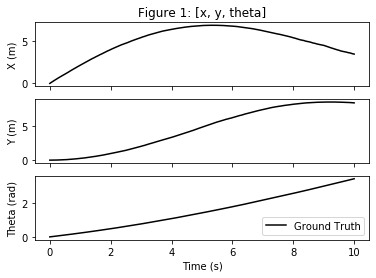

In [2]:
%matplotlib inline
from load_data import load_data
from figures import *
from extended_kalman_filter import extended_kalman_filter

data = load_data()

subplots(ground_truth=data['ground_truth'])

All the graphs share the same x-axis (time) and we can see the ground-truth of the
robot split to x, y and $\theta$.

Now for the robot XY motion:

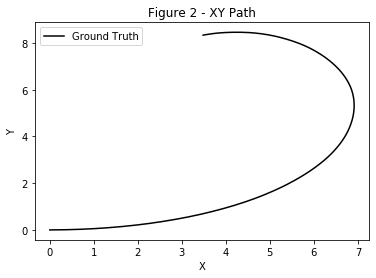

In [3]:
xy_path(ground_truth=data['ground_truth'])

Great move of the robot!

## Measurements Reconstruction

In order to reconstruct the $[x, y]$ coordinates of the robot using the measurements
I used the following equations:

$$x = r + cos(\pi + \phi + \theta) + m_x, \quad y = r + sin(\pi + \phi + \theta) + m_y$$

And 'Figure 2' with the measurements turn to be:

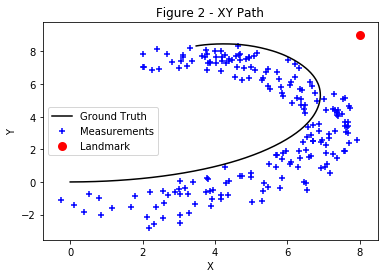

In [4]:
xy_path(ground_truth=data['ground_truth'],
         measurements=data['measurements'])


The measurements look with some bias in the y-axis. I rechecked it by adding the measurements to the $[x, y, \theta]$
plots and see how the $y$ measurements look like:

todo: add theta measurements

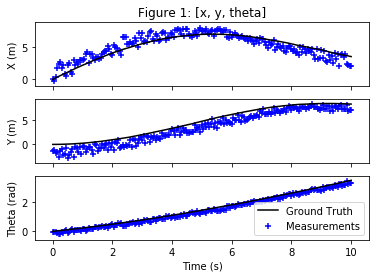

In [5]:
subplots(ground_truth=data['ground_truth'],
         measurements=data['measurements'])

All the y points are under the ground truth, so it definitely look
like there is a bias on the y-axis. Nevertheless, I tried my best.

## Running Extended Kalman Filter I

As described above, I implemented EKF for the localization of the robot.
The implementation of the algorithm is in the `extended_kalman_filter.py` script.
The main function in this script is the `extended_kalman_filter()`
which get the data frame of control and data frame of measurements
and return data frame of the estimated $[x, y, \theta]$ in each time step.
The function also returns 3D matrix with estimated $\Sigma$ for each time step.
In order to plot the estimations of my implementation I call the
above-mentioned function and plot the estimations. The requested
initial $\mu_0$ and $\Sigma_0$, the alphas and measurements' variances
are parameters in the script.


In [6]:
# First EKF run
# Estimate the location using EKF algorithm
ekf_mu_1, ekf_sigma_1 = extended_kalman_filter(control=data['controls'],
                                               measurement=data['measurements'])


Now we got the EKF estimations for the robot location. First we
plot the estimation split by $[x, y, \theta]$:


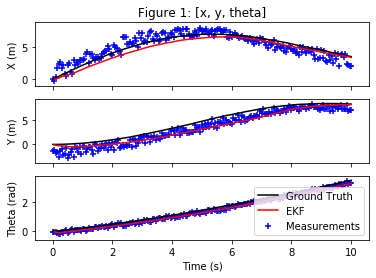

In [7]:
subplots(ground_truth=data['ground_truth'],
         estimation=ekf_mu_1,
         measurements=data['measurements'])

The $x$ and $\theta$ estimation look pretty good. The $y$ estimations are
less accurate, but I believe it because of the bias we saw in the measurements.
Now for the 'Figure 2':

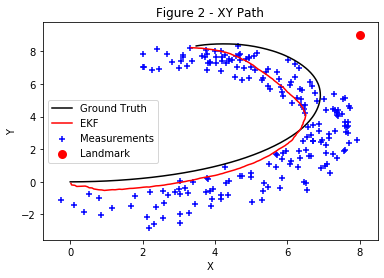

In [8]:
xy_path(ground_truth=data['ground_truth'],
        estimation=ekf_mu_1,
        measurements=data['measurements'])

When looking at the XY path it seem less accurate, but after we saw
each of the parameters separately I believe making $y$ measurements
more accurate will hopefully fix that too.

## Running Extended Kalman Filter II

Now we run for the second time the EKF algorithm and using $\sigma_r^2=0.01$
and $\sigma_\phi^2 = 0.007$, which mean much less noise in the measurements.
We override the default parameters in the EFK script and run again the
algorithm in order to get new estimations.

In [9]:
new_param = {'variances': {'r': 0.01, 'phi': 0.007}}

ekf_mu_2, ekf_sigma_2 = extended_kalman_filter(control=data['controls'],
                                               measurement=data['measurements'],
                                               params=new_param)

Now let's plot both figures, the subplots and the XY path:

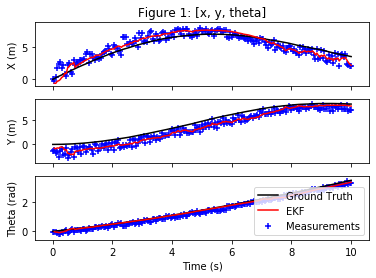

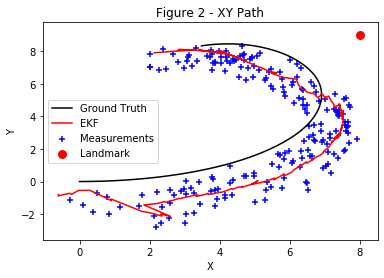

In [10]:
subplots(ground_truth=data['ground_truth'],
         estimation=ekf_mu_2,
         measurements=data['measurements'])

xy_path(ground_truth=data['ground_truth'],
        estimation=ekf_mu_2,
        measurements=data['measurements'])

Both plots seem less accurate and with a lot of noise.
The reason for it in both plots is the reduction we did in the
measurements' variances, i.e., $\sigma_r^2$ and $\sigma_\phi^2$.
Reduction in the measurements variance 'tell' the EKF to trust more
on the measurements (because low variance mean less noise and more accuracy).
But our measurements actually stay the same, so the algorithm trust
more on measurements with the same amount of noise (and even a bias).
That's the reason for the noisy estimations in the second run.

## Estimations' Variance Plot

In order to plot the variance ellipse I built a function called `get_cov_ellipse()` which
get covariance matrix and the center of the matrix, i.e., $x$ and $y$, and return an
`Ellipse` object. The `get_cov_ellipse()` function has an argument `nstd` which
determines the ellipse's radius. I used for all ellipse `nstd = 2`.
Then I added each Ellipse object to the XY graph.

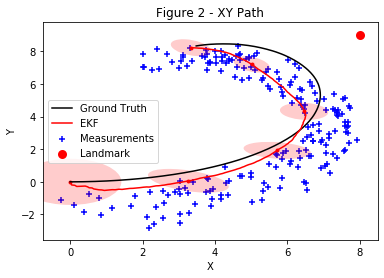

In [11]:
# Times to show an ellipse
ellipse_times = [int(i / 0.05) for i in [0, 2, 4, 6, 8, 10]]

# Get the plot without the ellipses
ax = xy_path(ground_truth=data['ground_truth'],
             estimation=ekf_mu_1,
             measurements=data['measurements'],
             return_axes=True)

# Add the ellipses and plot
add_confidence_ellipse(ax, ekf_sigma_1, ekf_mu_1, times=ellipse_times)

As we can see on the graph, the ellipses getting smaller with time. This make sense
because the EKF helps the robot to be more confident in his location. High confidence
manifested in small variance ellipse.

Now let's see how it look in the second run with the smaller $\sigma_r^2$ and $\sigma_\phi^2$.


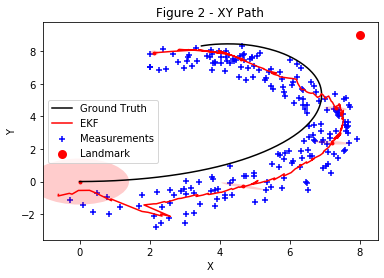

In [12]:
# Get the plot without the ellipses
ax = xy_path(ground_truth=data['ground_truth'],
             estimation=ekf_mu_2,
             measurements=data['measurements'],
             return_axes=True)

# Add the ellipses and plot
add_confidence_ellipse(ax, ekf_sigma_2, ekf_mu_2, times=ellipse_times)

First, we can see here the same procedure - the ellipses getting smaller with time.
Second, we can see the ellipse are much smaller. This aso make sense because
in the second run we changed the measurements' variance to be smaller. Small
variances will make the robot even more confident in his location.
